In [1]:
import sys

In [2]:
import scvelo as scv
import scanpy as sc
import cellrank as cr
import numpy as np

scv.settings.verbosity = 3
scv.settings.set_figure_params("scvelo")
cr.settings.verbosity = 2

In [3]:
import warnings
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=DeprecationWarning)

In [4]:
import os
import pandas as pd
os.getcwd()

'/Volumes/groups/tanaka/People/current/jiwang/projects/heart_regeneration/scripts'

In [5]:
data_version = 'CMsutypesAll_d0.d1_2.2'

In [6]:
input_Dir = "../results/sc_multiome_R13591_intron.exon.20220729/RNA_velocity_kallisto/"
data_seuratObj = os.path.join(input_Dir, 
                              "RNAmatrix_umap_kalisto.velocity_spliced_unspliced_" + str(data_version) + ".h5ad")

outDir = input_Dir + str(data_version)
if not os.path.exists(outDir):
   os.makedirs(outDir)

In [38]:
parameters = '_topGenes.3000_n.pcs.20_n.neighbors.30'

In [39]:
adata = sc.read_h5ad(data_seuratObj, chunk_size=6000)

In [40]:
adata

AnnData object with n_obs × n_vars = 2801 × 12446
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'iscell_dd', 'iscell_ed', 'condition', 'percent.mt', 'RNA_snn_res.0.7', 'seurat_clusters', 'RNA_snn_res.0.5', 'pANN_0.25_0.02_773', 'DF.classifications_0.25_0.02_773', 'pANN_0.25_0.01_606', 'DF.classifications_0.25_0.01_606', 'pANN_0.25_0.005_511', 'DF.classifications_0.25_0.005_511', 'pANN_0.25_0.005_610', 'DF.classifications_0.25_0.005_610', 'pANN_0.25_0.005_543', 'DF.classifications_0.25_0.005_543', 'subtypes', 'time', 'cell.ids', 'celltypes', 'cluster', 'cell.id', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'spliced_features', 'unspliced_features'
    obsm: 'X_umap'
    layers: 'spliced', 'unspliced'

In [41]:
outDir

'../results/sc_multiome_R13591_intron.exon.20220729/RNA_velocity_kallisto/CMsutypesAll_d0.d1_2.2'

In [42]:
adata.layers.keys()

KeysView(Layers with keys: spliced, unspliced)

In [43]:
adata.obs['condition']= adata.obs['condition'].astype('category') # change the condition into category type
adata.obs['celltypes']= adata.obs['celltypes'].astype('category')
adata.obs['cluster']= adata.obs['seurat_clusters'].astype('category')

In [44]:
adata.obs['condition'];

In [45]:
adata.obs['celltypes'];

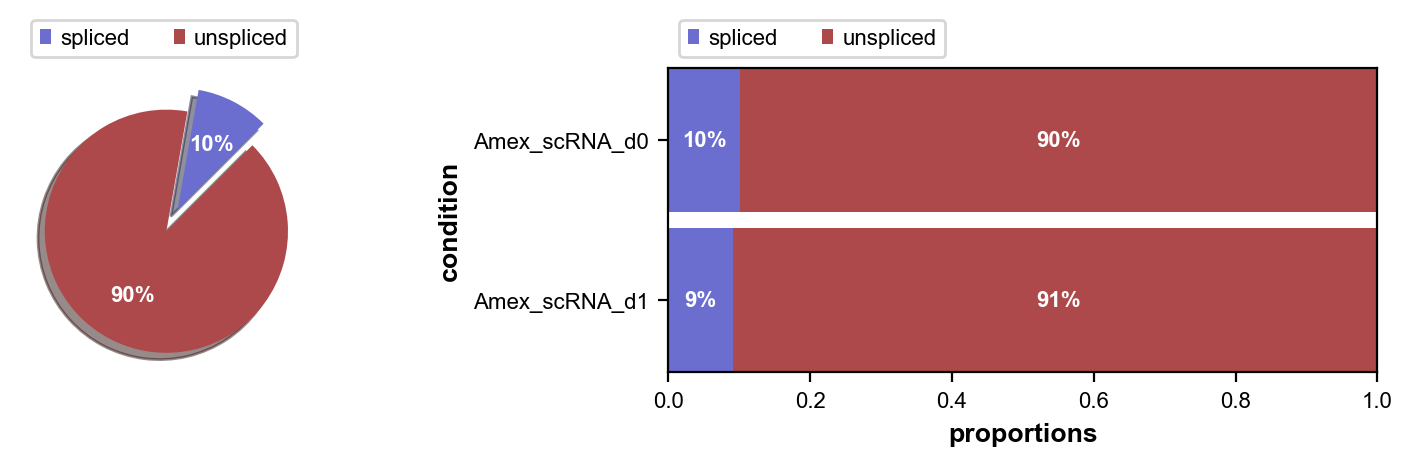

In [46]:
#adata = cr.datasets.pancreas()
scv.pl.proportions(adata, groupby='condition')

In [16]:
scv.pp.filter_and_normalize(adata, 
                            min_shared_counts=20, n_top_genes=3000, 
                            flavor = 'seurat', 
                            layers_normalize={'X', 'spliced', 'unspliced'}) # by specifying layers_normalize to renormalize the counts 
#sc.tl.pca(adata)
sc.pp.neighbors(adata, n_pcs=30, n_neighbors=20)
scv.pp.moments(adata, n_pcs=None, n_neighbors=None)

Filtered out 6730 genes that are detected 20 counts (shared).
Normalized count data: X, unspliced, spliced.
Extracted 3000 highly variable genes.
         Falling back to preprocessing with `sc.pp.pca` and default params.


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [17]:
#this below line is important!! no old umaps and pcas
#scv.pp.log1p(adata)
#sc.tl.pca(adata, svd_solver='arpack')
#sc.pl.pca_variance_ratio(adata, log=True)


In [18]:
#sc.pp.neighbors(adata, n_neighbors=20, n_pcs=30)
#sc.tl.paga(adata,  groups = 'celltypes')
#sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
#sc.tl.umap(adata, init_pos='paga')
#sc.pl.umap(adata, frameon=False, legend_loc='on data', title='', save='a10222_celltypes_ok.pdf')

In [19]:
#sc.pl.umap(adata)

In [20]:
#sc.tl.pca(adata)
#sc.pp.neighbors(adata, n_pcs=30, n_neighbors=30)
#scv.pp.moments(adata, n_pcs=None, n_neighbors=None)

In [21]:
adata

AnnData object with n_obs × n_vars = 2801 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'iscell_dd', 'iscell_ed', 'condition', 'percent.mt', 'RNA_snn_res.0.7', 'seurat_clusters', 'RNA_snn_res.0.5', 'pANN_0.25_0.02_773', 'DF.classifications_0.25_0.02_773', 'pANN_0.25_0.01_606', 'DF.classifications_0.25_0.01_606', 'pANN_0.25_0.005_511', 'DF.classifications_0.25_0.005_511', 'pANN_0.25_0.005_610', 'DF.classifications_0.25_0.005_610', 'pANN_0.25_0.005_543', 'DF.classifications_0.25_0.005_543', 'subtypes', 'time', 'cell.ids', 'celltypes', 'cluster', 'cell.id', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'spliced_features', 'unspliced_features', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'neighbors'
    obsm: 'X_umap

In [22]:
#adata.var['velocity_genes']

In [23]:
scv.tl.recover_dynamics(adata, n_jobs=10, max_iter=10) 

recovering dynamics (using 10/10 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:00:07) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [24]:
adata

AnnData object with n_obs × n_vars = 2801 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'iscell_dd', 'iscell_ed', 'condition', 'percent.mt', 'RNA_snn_res.0.7', 'seurat_clusters', 'RNA_snn_res.0.5', 'pANN_0.25_0.02_773', 'DF.classifications_0.25_0.02_773', 'pANN_0.25_0.01_606', 'DF.classifications_0.25_0.01_606', 'pANN_0.25_0.005_511', 'DF.classifications_0.25_0.005_511', 'pANN_0.25_0.005_610', 'DF.classifications_0.25_0.005_610', 'pANN_0.25_0.005_543', 'DF.classifications_0.25_0.005_543', 'subtypes', 'time', 'cell.ids', 'celltypes', 'cluster', 'cell.id', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'spliced_features', 'unspliced_features', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_r2', 'fit_alpha', 'fit_beta', 'f

In [25]:
# save the velocity result
# adata.write(os.path.join(outDir, 'my_results_velocity_recover_dynamics.h5ad'), compression="gzip")

In [26]:
# reload the calculated velocity from tl.recover_dynamics
# adata = sc.read_h5ad(os.path.join(outDir,'my_results_velocity_recover_dynamics.h5ad'), chunk_size=6000)

In [27]:
scv.tl.velocity(adata, mode="dynamical", 
                min_r2=0.01,
                min_likelihood=0.001)

scv.tl.velocity_graph(adata, approx = None, sqrt_transform = None)

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/10 cores)
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [28]:
print(adata.var.velocity_genes.sum()) # check the genes used for RNA velocity

104


In [29]:
adata.var['velocity_genes']

RAMP2-AMEX60DD010004     False
MYO10-AMEX60DD010014     False
CAVIN1-AMEX60DD010031    False
STAT5B-AMEX60DD010039    False
PLCL2-AMEX60DD010043     False
                         ...  
ANKRD1-AMEX60DD052557     True
AMEX60DD054908            True
NUAK1-AMEX60DD007845     False
AMEX60DD008169           False
NTN4-AMEX60DD008263       True
Name: velocity_genes, Length: 3000, dtype: bool

In [30]:
## manually excluding cell cycle genes
#ggs = pd.read_csv(os.path.join(input_Dir, "cellcycle_gene.csv"))
#ggs
#ggs.iloc[:,0]
#len(ggs.iloc[:,0])
#velocity_genes = adata.var['velocity_genes']
#[velocity_genes == True].index
#ggs.iloc[0,0]

In [31]:
#velocity_genes = adata.var['velocity_genes']

#for index_i in range(len(ggs.iloc[:,0])):
#    #print(index_i)
#    gene_cellcycle = ggs.iloc[index_i,0]
#    #print(gene_cellcycle)
#    if gene_cellcycle in velocity_genes[velocity_genes==True].index:
#        print(gene_cellcycle, 'in velocity genes')
#        adata.var['velocity_genes'][gene_cellcycle] = False

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
figure cannot be saved as pdf, using png instead.
saving figure to file ../results/sc_multiome_R13591_intron.exon.20220729/RNA_velocity_kallisto/CMsutypesAll_d0.d1_2.2/RNAvelocity_stream_model_dynamical_topGenes.3000_n.pcs.10_n.neighbors.30.png


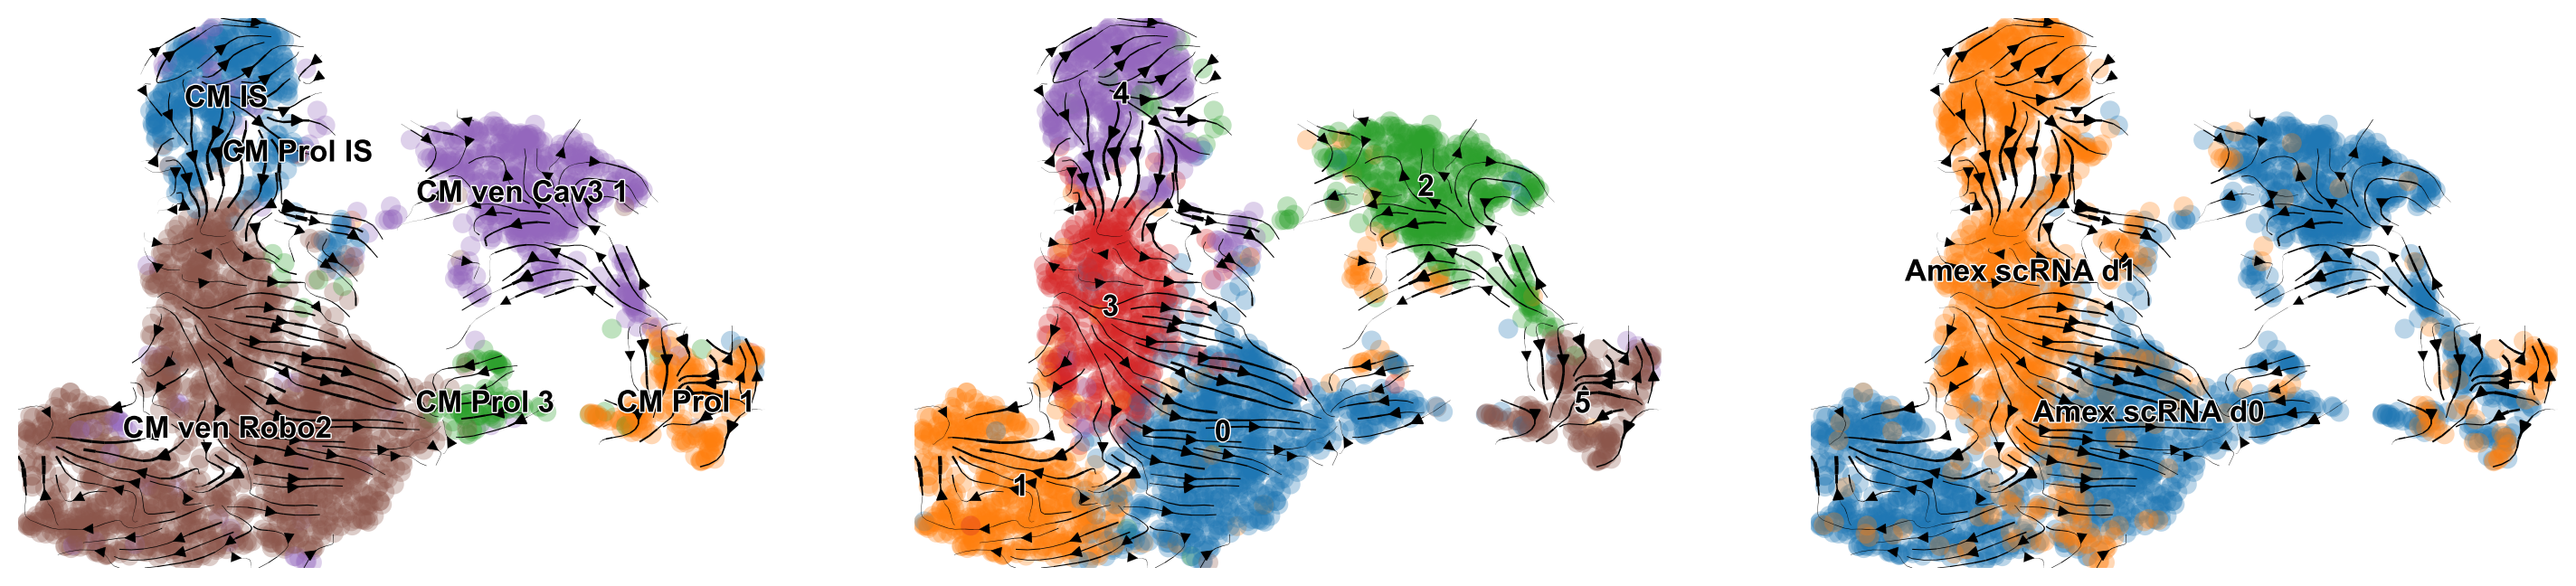

In [32]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.5, min_mass=1,
    legend_fontsize=12, title="", color = ['celltypes',  'cluster', 'condition'], 
    save=os.path.join(outDir, "RNAvelocity_stream_model_dynamical" + parameters + ".pdf"))

In [ ]:
scv.pl.velocity_embedding(adata, dpi=120, arrow_size=2, arrow_length=4)

In [ ]:
scv.pl.velocity_embedding_grid(adata, color = ['celltypes',  'cluster', 'condition'], 
                               dpi=120, arrow_size=2, arrow_length=4,
                               smooth=0.5, min_mass=1,
                               save=os.path.join(outDir, 
                                                 "RNAvelocity_gridEmbedding_model_dynamical" + parameters + ".pdf")
                              )

In [ ]:
scv.pl.velocity_embedding_grid(adata, color = ['celltypes'], 
                               dpi=120, arrow_size=2, arrow_length=4,
                               smooth=0.5, min_mass=1
                              )

In [ ]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.5, min_mass=1,
    legend_fontsize=12, title="", color = ['celltypes']
    )

In [ ]:
scv.tl.velocity(adata, mode="steady_state")
scv.tl.velocity_graph(adata, approx = None, sqrt_transform = None)

In [ ]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.6, min_mass=1,
    legend_fontsize=12, title="", color = ['celltypes',  'cluster', 'condition'], 
    save=os.path.join(outDir, "RNAvelocity_stream_steadystat" + parameters + ".pdf")
)

In [ ]:
scv.pl.velocity_embedding_grid(adata, 
                               basis="umap", smooth=0.5, min_mass=1, n_neighbors = 10,
                               color = ['celltypes',  'cluster', 'condition'], 
                               dpi=120, arrow_size=2, arrow_length=5, 
                               save=os.path.join(outDir, "RNAvelocity_grid_model_steadystat" + parameters + ".pdf")
                              )

In [ ]:
scv.tl.velocity(adata, mode="stochastic")
scv.tl.velocity_graph(adata)


In [ ]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.5, min_mass=1,
    legend_fontsize=12, title="", color = ['celltypes',  'cluster', 'condition'],
    save=os.path.join(outDir, "RNAvelocity_stream_stochastic" + parameters + ".pdf")
)

In [ ]:
scv.pl.velocity_embedding_grid(adata, 
                               basis="umap", smooth=0.5, min_mass=0.7, n_neighbors = 10,
                               legend_fontsize=12,
                               color = ['celltypes',  'cluster', 'condition'], 
                               dpi=120, arrow_size=2, arrow_length=5, 
                               save=os.path.join(outDir, "RNAvelocity_grid_model_stochastic" + parameters + ".pdf")
                              )

In [ ]:
outDir 

In [ ]:
######################################################################## 
######################################################################## 
#### TEST PAGA ########
######################################################################## 
######################################################################## 

/Users/jingkui.wang/anaconda3/envs/cellrank/lib/python3.7/site-packages/networkx/convert.py:157: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `from_scipy_sparse_array` instead.
  return nx.from_scipy_sparse_matrix(data, create_using=create_using)


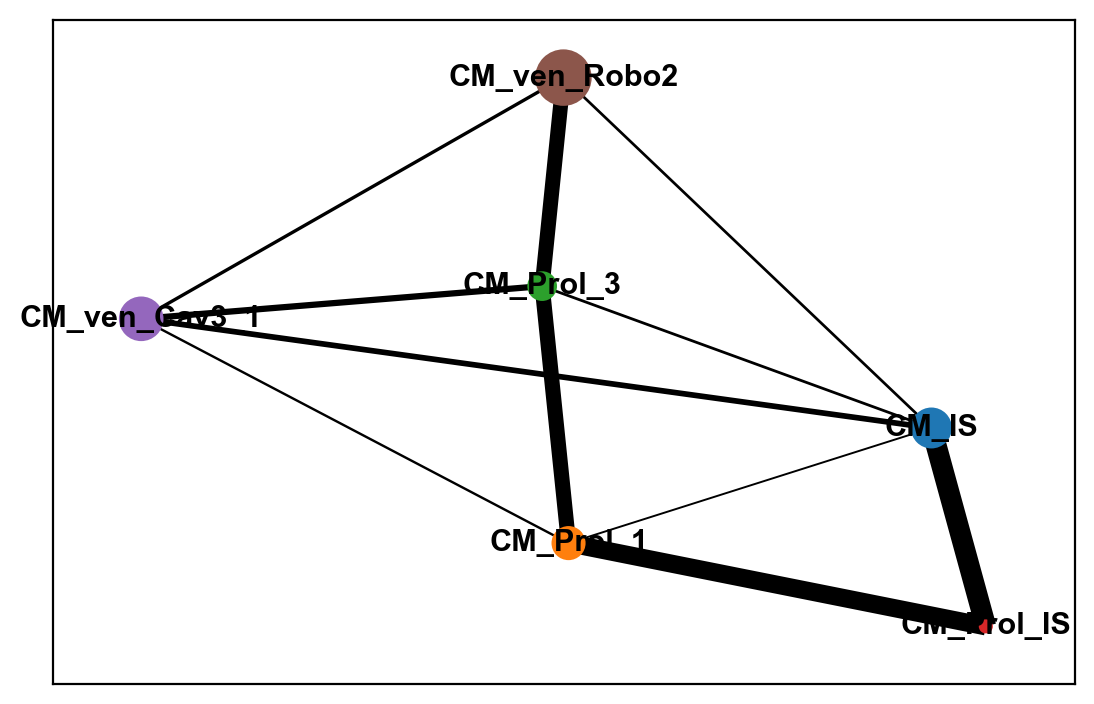

In [33]:
sc.tl.paga(adata, groups='celltypes')
sc.pl.paga(adata, 
           color=['celltypes'], threshold=0.05, show=True,
        )

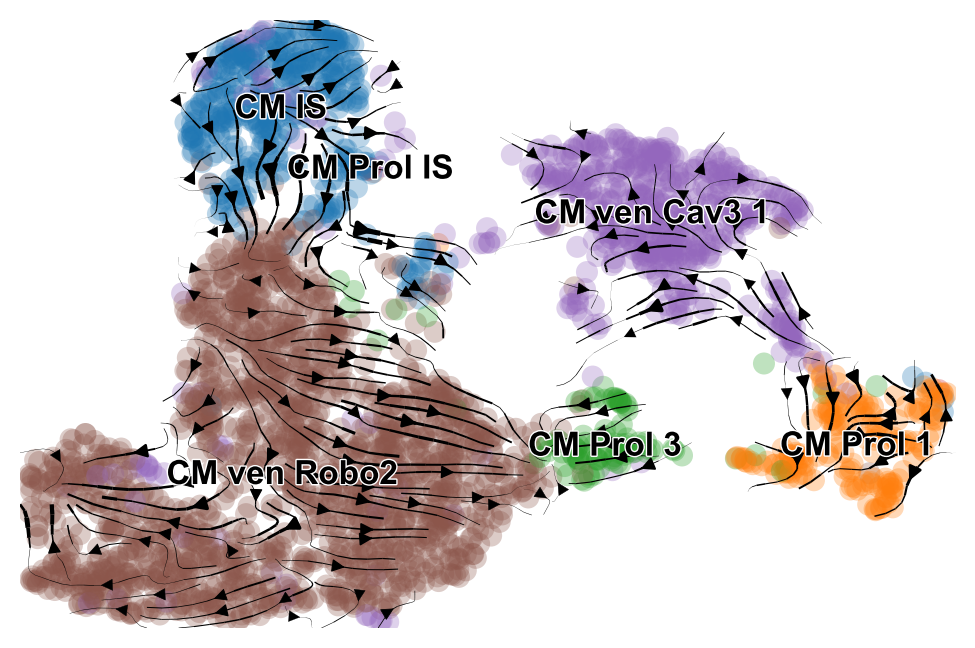

In [34]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.5, min_mass=1,
    legend_fontsize=12, title="", color = "celltypes"
)

/Users/jingkui.wang/anaconda3/envs/cellrank/lib/python3.7/site-packages/networkx/convert.py:157: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `from_scipy_sparse_array` instead.
  return nx.from_scipy_sparse_matrix(data, create_using=create_using)


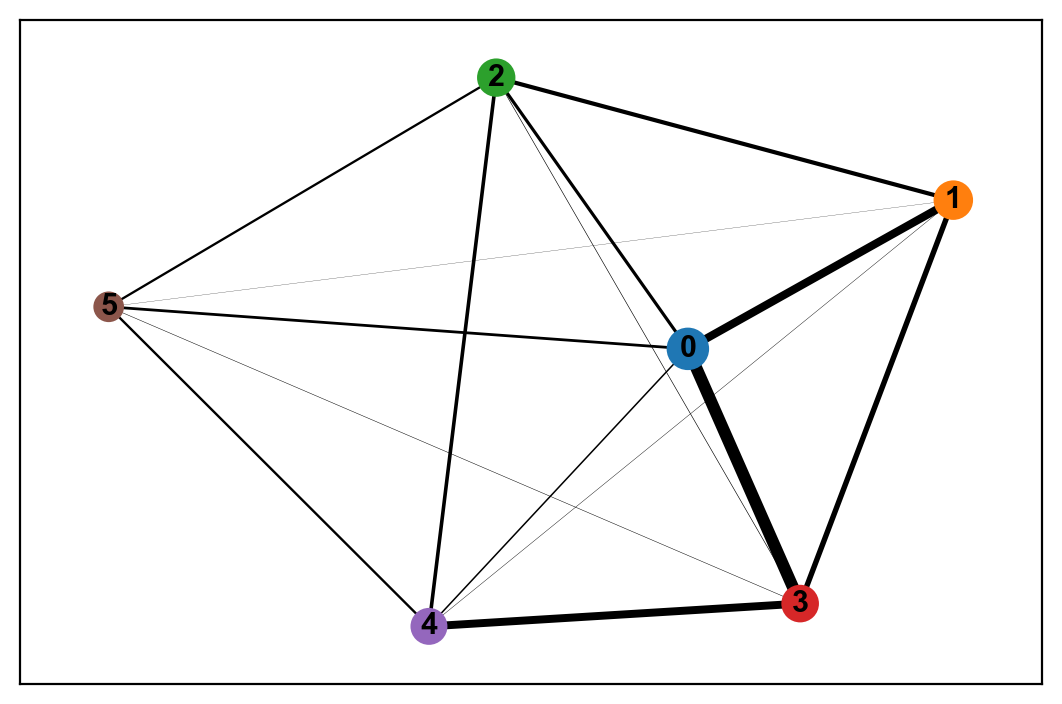

In [35]:
sc.tl.paga(adata, groups='cluster')
sc.pl.paga(adata, color=['cluster'])

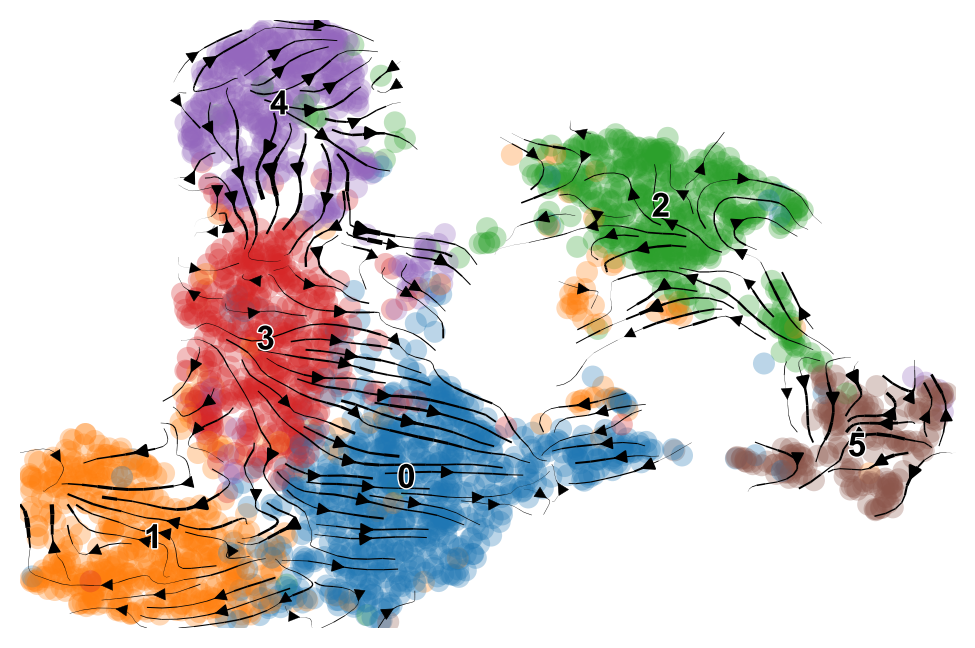

In [36]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.5, min_mass=1,
    legend_fontsize=12, title="", color = "cluster"
)

computing terminal states
    identified 7 regions of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
running PAGA using priors: ['velocity_pseudotime']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


/Users/jingkui.wang/anaconda3/envs/cellrank/lib/python3.7/site-packages/networkx/convert.py:157: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `from_scipy_sparse_array` instead.
  return nx.from_scipy_sparse_matrix(data, create_using=create_using)


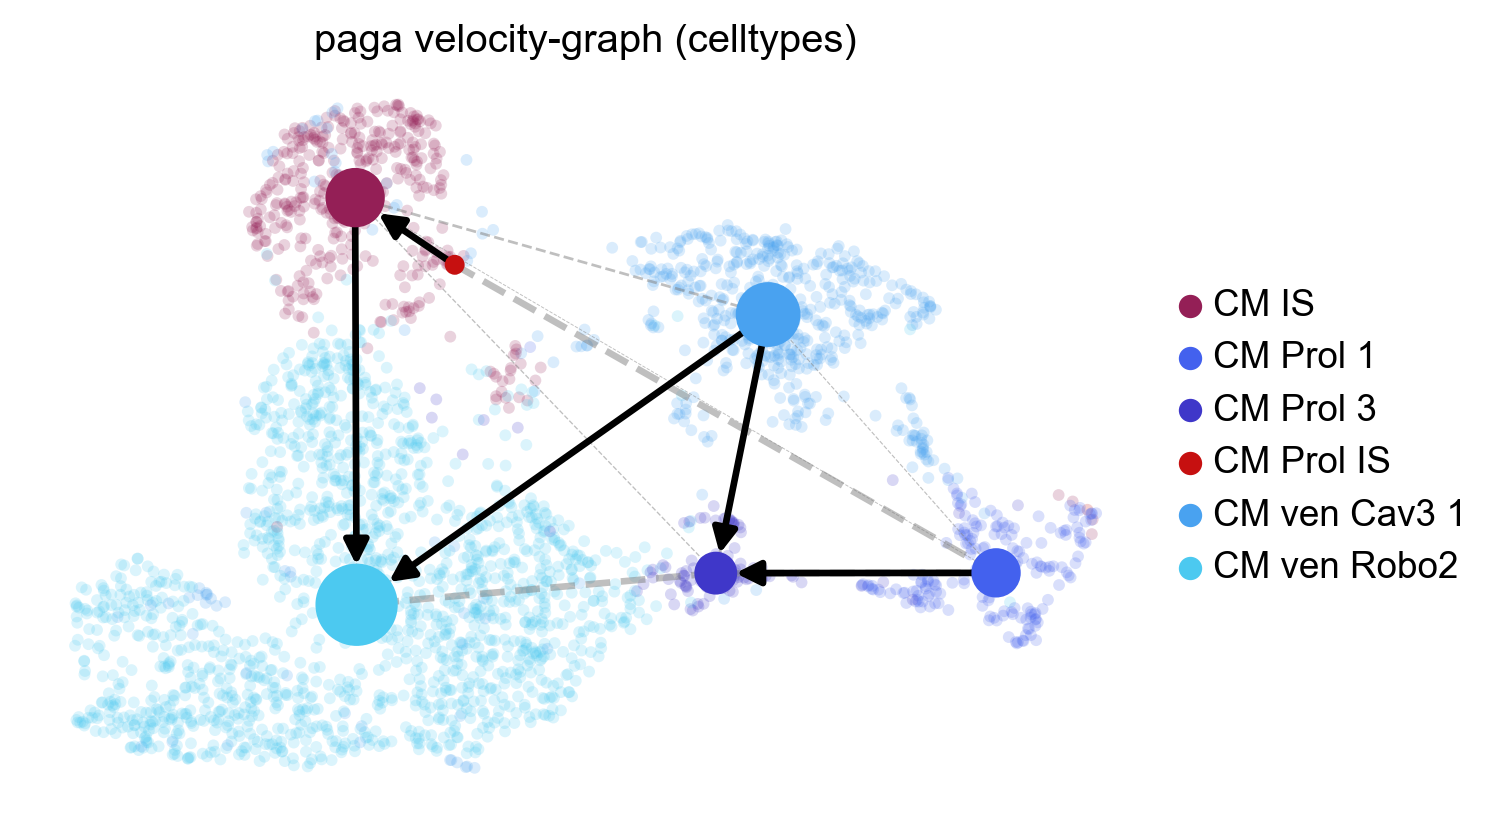

In [37]:
scv.tl.paga(adata, groups='celltypes')
scv.pl.paga(adata, basis='umap', size=50, alpha=0.2,
            min_edge_width=2, node_size_scale=1.5, 
            dpi = 120, 
            show=True,
            palette={"CM_ven_Robo2": "#4CC9F0",  
                     "CM_ven_Cav3_1": "#49A2F0",
                     "CM_IS": "#941F56",
                     "CM_Prol_IS": "#C61010",
                     "CM_Prol_1": "#4361EE",
                     "CM_Prol_3": "#3F37C9"
                    }
            
            
           )

In [ ]:
# compare three models and it seems that the steady state works relatively better for root and terminal cells

In [ ]:
#scv.tl.velocity(adata, mode="dynamical") # test dynamical model
#scv.tl.velocity(adata, mode="steady_state")
scv.tl.velocity(adata, mode="dynamical") # test dynamical model
scv.tl.velocity_graph(adata)

In [ ]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.5, min_mass=1,
    legend_fontsize=12, title="", color = "celltypes"
)

In [ ]:
scv.tl.velocity_confidence(adata)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95])


In [ ]:
scv.pl.velocity_graph(adata, threshold=.1, color='celltypes')
#scv.pl.velocity_graph(adata, threshold=.1, color='cluster')

In [ ]:
#adata.obs_names
#adata[adata.obs["cluster"] == '2'].obs_names

In [ ]:
x, y = scv.utils.get_cell_transitions(adata, basis='umap', 
                                      # starting_cell = adata[adata.obs["cluster"] == '2'].obs_names
                                      starting_cell = 0,
                                     )

ax = scv.pl.velocity_graph(adata, c='lightgrey', edge_width=.05, show=False)
ax = scv.pl.scatter(adata, x=x, y=y, s=120, c='ascending', cmap='gnuplot', ax=ax)

In [ ]:
scv.tl.velocity_pseudotime(adata)
scv.pl.scatter(adata, color='velocity_pseudotime', cmap='gnuplot')

In [ ]:
adata.uns['neighbors']['distances'] = adata.obsp['distances']
adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']

scv.tl.paga(adata, groups='celltypes')
df = scv.get_df(adata, 'paga/transitions_confidence', precision=2).T
#df.style.background_gradient(cmap='Blues').format('{:.2g}')


In [ ]:
scv.tl.paga(adata, groups='celltypes')
scv.pl.paga(adata, basis='umap', size=50, alpha=0.2,
            min_edge_width=2, node_size_scale=1.5, 
            dpi = 120, 
            show=True,
            palette={"CM_ven_Robo2": "#4CC9F0",  
                     "CM_ven_Cav3_1": "#49A2F0",
                     "CM_IS": "#941F56",
                     "CM_Prol_IS": "#C61010",
                     "CM_Prol_1": "#4361EE",
                     "CM_Prol_3": "#3F37C9"
                    }
           )

In [ ]:
scv.pl.paga(adata, basis='umap', size=50, alpha=0.2,
            min_edge_width=2, node_size_scale=1.5, 
            dpi = 120, 
            show=True,
            palette={"CM_ven_Robo2": "#4CC9F0",  
                     "CM_ven_Cav3_1": "#49A2F0",
                     "CM_IS": "#941F56",
                     "CM_Prol_IS": "#C61010",
                     "CM_Prol_1": "#4361EE",
                     "CM_Prol_3": "#3F37C9"
                    },
            save="PAGA_umap_CMsubtypes_colored_test2.pdf"
            
           )


In [ ]:
adata;

In [ ]:
## top genes
top_genes = adata.var.sort_values('fit_likelihood', ascending=False).index[:20]
scv.pl.scatter(adata, basis=top_genes, color="condition", wspace=1, hspace=1, nrows=4, ncols=5)

In [ ]:
# plot velocity of a selected gene
scv.pl.velocity(adata, var_names=['TRIM50-AMEX60DD054231', 'ROBO2-AMEX60DD047487'], color='celltypes')


In [ ]:
scv.tl.rank_velocity_genes(adata, groupby='celltypes', min_corr=.3)
df = scv.DataFrame(adata.uns['rank_velocity_genes']['names'])
df.head()

In [ ]:
df = adata.var
df = df[(df['fit_likelihood'] > .1) & df['velocity_genes'] == True]

kwargs = dict(xscale='log', fontsize=16)
with scv.GridSpec(ncols=3) as pl:
    pl.hist(df['fit_alpha'], xlabel='transcription rate', **kwargs)
    pl.hist(df['fit_beta'] * df['fit_scaling'], xlabel='splicing rate', xticks=[.1, .4, 1], **kwargs)
    pl.hist(df['fit_gamma'], xlabel='degradation rate', xticks=[.1, .4, 1], **kwargs)

scv.get_df(adata, 'fit*', dropna=True).head()


In [ ]:
#####latent time
#scv.tl.terminal_states(adata)
#scv.tl.latent_time(adata)
#scv.pl.scatter(adata, color='latent_time',color_map='gnuplot', size=80)
#scv.pl.scatter(adata, color=[ 'root_cells', 'end_points'])

In [ ]:
# save the scvelo result
adata
adata.write(os.path.join(outDir,'my_results_scvelo_dynamical.h5ad'), compression="gzip")

In [ ]:
######################################################################## 
#
# Run CellRank using kernel functions -- https://cellrank.readthedocs.io/en/stable/kernels_and_estimators.html 
#
######################################################################## 

In [ ]:
adata = sc.read_h5ad(os.path.join(outDir,'my_results_scvelo_dynamical.h5ad'), chunk_size=6000)

In [ ]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.5, min_mass=1,
    legend_fontsize=12, title="", color = "cluster"
)


In [ ]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['cluster']  == '0')[0]
sc.tl.dpt(adata)

In [ ]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.5, min_mass=1,
    legend_fontsize=12, title="", color = "dpt_pseudotime",
    dpi = 120,
    save=os.path.join(outDir, "scvelo_dpt_pseudotime.pdf")
)

In [ ]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.4, min_mass=1,
    legend_fontsize=12, title="", color = "condition",
    dpi = 120, 
    save=os.path.join(outDir, "scvelo_condition.pdf")
)

In [ ]:
from cellrank.tl.kernels import VelocityKernel
vk = VelocityKernel(adata)
pk = cr.tl.kernels.PseudotimeKernel(adata)

In [ ]:
# Compute a transition matrix
pk.compute_transition_matrix()
vk.compute_transition_matrix()

In [ ]:
# Combining multiple kernels
from cellrank.tl.kernels import ConnectivityKernel
ck = ConnectivityKernel(adata).compute_transition_matrix()

In [ ]:
combined_kernel = 0.2 * vk + 0.3 *pk + 0.5 * ck
#combined_kernel = 0.8 * vk + 0.2 * ck
#combined_kernel = 0.8 * vk + 0.2 * ck

In [ ]:
# Initialize an estimator
from cellrank.tl.estimators import GPCCA

g = GPCCA(combined_kernel)
print(g)

In [ ]:
# Compute a matrix decomposition
g.compute_schur(n_components=6) # method with 'brandts', otherwise kernel will be killed; take really a long time for 40k cells 
g.plot_spectrum()

In [ ]:
# Infer terminal states
g.compute_macrostates(n_states = 2, cluster_key="cluster")
g.plot_macrostates()

In [ ]:
g.plot_macrostates(same_plot=False, discrete=True)

In [ ]:
#g.set_terminal_states({"Neurons": adata[adata.obs["clusters"] == "8"].obs_names}, add_to_existing=False)
#g.set_terminal_states({"FP": adata[adata.obs["clusters"] == "5"].obs_names}, add_to_existing=True)
g.compute_terminal_states()

In [ ]:
g.compute_absorption_probabilities()

In [ ]:
g.plot_absorption_probabilities(discrete = True, 
                                same_plot = False, 
                                save=os.path.join(outDir, "cellrank_absorption_probs_vk0.5_pk0.3_ck0.2.pdf"))

In [ ]:
fp_drivers = g.compute_lineage_drivers(lineages="FP", return_drivers=True)
fp_drivers.sort_values(by="FP_corr", ascending=False)

In [ ]:
g.plot_lineage_drivers("FP", n_genes=50,
                      #save=os.path.join(outDir, "cellrank_FP_drivers.pdf")
                       save = 'cellrank_fp_drivers.pdf'
                      )

In [ ]:
nr_drivers = g.compute_lineage_drivers(lineages="Neurons", return_drivers=True)
nr_drivers.sort_values(by="Neurons_corr", ascending=False)

In [ ]:
g.plot_lineage_drivers("Neurons", n_genes=50,
                       #save=os.path.join(outDir, "cellrank_Neurons_drivers.pdf")
                       save = 'cellrank_np_drivers.pdf'
                      )


In [ ]:
fp_drivers.to_csv(os.path.join(outDir,'res_fp_drivers.csv'))
nr_drivers.to_csv(os.path.join(outDir,'res_neuron_drivers.csv'))

In [ ]:
################# 
# Run CellRank using basic functions -- https://cellrank.readthedocs.io/en/stable/cellrank_basics.html
#################

In [ ]:
adata
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.5, min_mass=1,
    legend_fontsize=12, title="", color = "clusters"
)

In [ ]:
# Identify terminal states
# it did not work well, see issue in https://github.com/theislab/cellrank/issues/399
cr.tl.terminal_states(adata, 
                      n_states = 2, 
                      cluster_key="clusters", 
                      weight_connectivities=0.2, 
                      force_recompute = True)

In [ ]:
cr.pl.terminal_states(adata)

In [ ]:
# Identify initial states
cr.tl.initial_states(adata, 
                     n_states = 1, 
                     cluster_key="clusters")
cr.pl.initial_states(adata, discrete=True)

In [ ]:
# Compute fate maps
cr.tl.lineages(adata)
cr.pl.lineages(adata, same_plot=False)

In [ ]:
cr.pl.lineages(adata, same_plot=False, 
              save=os.path.join(input_Dir, "CellRank_fatemap_stochasticModel.pdf"))

In [ ]:
cr.pl.log_odds(
    adata,
    lineage_1="5",
    lineage_2="10",
    time_key="time",
    keys=["condition"],
    threshold=0,
    size=2,
    xticks_step_size=4,
    figsize=(9, 4),
)

In [ ]:
### Directed PAGA not used 

In [ ]:
scv.tl.recover_latent_time(
    adata, root_key="initial_states_probs", end_key="terminal_states_probs"
)

In [ ]:
scv.tl.paga(
    adata,
    groups="condition",
    root_key="initial_states_probs",
    end_key="terminal_states_probs",
    use_time_prior="velocity_pseudotime",
)


In [ ]:
cr.pl.cluster_fates(
    adata,
    mode="paga_pie",
    cluster_key="condition",
    basis="umap",
    legend_kwargs={"loc": "top right out"},
    legend_loc="top left out",
    node_size_scale=5,
    edge_width_scale=1,
    max_edge_width=4,
    title="directed PAGA",
    save=os.path.join(input_Dir, "CellRank_PAGA_fateProb_condition_umapV3.pdf")
)


In [ ]:
scv.tl.paga(
    adata,
    groups="clusters",
    root_key="initial_states_probs",
    end_key="terminal_states_probs",
    use_time_prior="velocity_pseudotime",
)
cr.pl.cluster_fates(
    adata,
    mode="paga_pie",
    cluster_key="clusters",
    basis="umap",
    legend_kwargs={"loc": "top right out"},
    legend_loc="top left out",
    node_size_scale=5,
    edge_width_scale=1,
    max_edge_width=4,
    title="directed PAGA",
    save=os.path.join(input_Dir, "CellRank_PAGA_fateProb_clusters_umapV3.pdf"),
)
